<a href="https://colab.research.google.com/github/Nikhila-KS/Unravel_ML/blob/main/Mboalab_final_ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Mboathoscope </b>

Mboathoscope is an open source digital stethoscope AI app that allows users to record, visualize and analyze heart and lung sounds. It uses machine learning algorithms to provide insights into the audio data and aid in the diagnosis of cardiovascular and respiratory diseases. It is a Project created and maintained by the Mboalab Community originating and based in Cameroon. During training; recorded heartsounds where used but during testing bluetooth sound via a smart phone can be used.

## 🔹 Author
Nikhila K S and Sumaya Ahmed Salihs - Outreachy May - August, 2023 Cohort




##🔹Dataset

During our search, we came across Peter Bentley's 'Classifying Heart Sounds Challenge,' which provided the data in the exact format we required. This data originated from two distinct sources:

1. Clinical trial data from hospitals that utilized a digital stethoscope.
2. Data contributed by the public via the iStethoscope Pro iPhone app.
Our dataset comprised a total of 585 labeled audio files and 247 unlabeled audio files. For the purpose of this project, we utilized the labeled audio files to construct our machine learning model.

Within our dataset, we identified five major heart sound classes, which are as follows:

1. Normal: This class represents strong rhythmic heartbeats with a distinct lub-dub auditory pattern.
2. Murmurs: These are characterized by a "whooshing, roaring, rumbling, or turbulent fluid" sound between the lub and the dub.
3. Extrahls: Heartbeats in this class resemble a "galloping noise."
4. Extrasystole: This class refers to out-of-rhythm heart sounds, often caused by extra or skipped heartbeats.
5. Artifact: This class encompasses a wide range of different sounds that are not heartbeats, such as feedback squeals, echoes, speech, music, and noise.

You can find a well documented deatils of the dataset [here](http://www.peterjbentley.com/heartchallenge/)

**Disclaimer :** We advised due to the large size of dataset that you train using your locally set environement since training from free cloud notebook resources like Google Colab and Kaggle can lead to a lot unsucessful attempt at training. i.e. Training could take as best as 6hrs 30mins and as worst as 15hours, most of the times your Google Colab or Kaggle Notebook would have gotten too exhausted and cleared it environmental variables. Sometimes, the training will just abruptly fail, not to say you can't have a successful training from Google Colab but you are likley to have many unsucessful attempts as well. But if you have a very powerful machine with high CPU and GPU, you can definately do it from here. The Machines that the authours used are:


1. MacBook Pro, 13-inch, 2017, Core i5, Intel Iris Plus Graphics 640 1536 MB, 8GB, MacOS Ventura
2. Lenovo Ideapad Slim 3, CPU Model: Ryzen 5, RAM: 8GB,OS: Windows 10 Home
  

Also, in order to get more information about our journey to creating this model, follow the specific blog we created for the creation of the model and our experiences while creating it.


*   [Blog1](https://mayasaliscode.wordpress.com/2023/07/04/training-my-first-heartbeat-model-heavy-duty-task-94-accuracy/)
*  [Blog2](https://dev.to/nikhila_ks/uu-4lp1)

Also, if you want to be able run everything here through a single file, you can download our python [file](https://github.com/sumayaSalihs/TrainHeartBeatSound/blob/main/TrainSoundFile.py) and just run it from any IDE of your choice, command prompt or unix/mac terminal. During augmentation, in the process of creating the 'OUT' folder where all augmented files are copied into, when using Google Colab, for everytime you run the cell that performs the sound_augmentation, a new OUT foleder could be created into your drive in some cases, i.e. when your runtime begins to malfunction/freeze, so it is advisable to ensure that you are not creating any unnecessary replication of folder which might inturn overwhem your personal drive storage and affect the perfomance of your Google Colab IDE, which heavily depends on the storage from Google Drive.



## 🔹Libraries used
1. glob:
2. os:
3. librosa:
4. pandas:
5. matplotlib:
6. numpy:
7. IPython:
8. shutil:
9. soundfile:
10. tqdm:
11. sklearn:
12. keras:
13. time:
14. tensorflow:


**Disclaimer**: Libaries are briefly described here, you can find the detailed description where it is being used.


In [2]:
import glob
import os
import librosa as lib
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import IPython.display as ipd
import shutil
import soundfile
from tqdm import tqdm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import time
import tensorflow as tf

**Paths to Datasets**
<br>
Paths existing in this project are unique to the appropraite paths of the authors, i.e. since they used their locally setup tools, they ended up using their PC/Desktop for storing files and for training purposes. If you plan to use Google Drive via Google Colab, you can either upload the folder as a zip file directly here and unzip it to work with it or import it from your Google Drive(we recommend this as it is more efficient, i.e. you lose files when your runtime goes out of context). Find how to use import from Google drive in the cell below. This processes individually takes between 15 to 20 minutes at best.

## 🔹Import Dataset
We compressed our dataset into a zip folder and uploaded it to google drive. You can access the dataset from [here](https://drive.google.com/file/d/1P07hvBoRW6Pd4QRLVWgKzZQRoytQE7EM/view?usp=sharing).

The following lines of code loads the zip folder from google drive and unzips the zip folder so as to extracts all of the files from the ZIP file to the current directory.



In [3]:
from google.colab import drive
drive.mount('/content/drive')
# Upload data
from zipfile import ZipFile
file_name = '/content/drive/My Drive/HeartBeatSounds.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')



Mounted at /content/drive
done


<hr>

The **'data_path'** and **'parent_data_path'** are variables containing the path address of our data. If you want to visualise and check the folders & data we would suggest you to download the zip folder attached above and then upload it into you google drive. After uploading run the above cells, in the Left navigation below the 'Table of content icon' there is a 'Files icon'(note: if you are confused try placing your mouse pointer on top of the icons on the left navigation pane of the page to reveal it name, you will find the 'Files icon' at the bottom of all the left pane icons/navigation), on navigating to Files folder you will notice a Folder - 'HeartBeatSounds' , you can inspect this directory.


The last line of the code block below defines the variable **encode** as a new instance of the LabelEncoder class. The LabelEncoder class is used to encode categorical data into integers/numerical format. This is useful for most machine learning algorithms since they require/work with numerical data. For example, if we have a categorical variable with three levels, normal, abnormal, and unknown, we can use the LabelEncoder class to encode these levels as integers, such as 0, 1, and 2. This allows the machine learning algorithm to be able to process it/work with it. You will get an error if you try using categorical data in most ML/Deep Learning Algorithms.

Tip: If you get confused about path just because you are dealing with zip folder, follow the direction from the image below, i.e. right click on either the file or folder who path you want to know and then click on copy path, then voila, you have your path in your clipboard for pasting.


<img src="https://github.com/Nikhila-KS/Nikhila-KS/assets/100426366/4e435433-5708-4776-8c7e-1a47903d9c2d" width="440" height="400">

In [4]:
data_path = '/content/HeartBeatSounds/archive/'
parent_data_path = "/content/HeartBeatSounds/"
encode = LabelEncoder()
#used by several instances, You need to call fit(...) or fit_transform(...) on your LabelEncoder before you can access classes_


<hr>

The below 4 code block are resulting in creation of a **dataframe**. A dataframe is a two-dimensional data structure that is used to store and manipulate data. It is similar to a spreadsheet, but it is more flexible and powerful. Dataframes are often used to store data that is used in machine learning models.

We created the variable 'raw_data' which stores the data frame. A function/method 'get_raw_data' is been called which further calls the function/method 'create_dataframe'.

In our Zip folder which we uploaded earlier there are two folders 'set_a' and 'set_b'. Data collected from general public via the iStethoscope Pro iPhone app is presentbin 'set_a' and  data collected from clinic trial in hospitals using the digital stethoscope DigiScope is given in 'set_b'

So the create_dataframe method takes data frame name and folder path as argument, it then iterates through all the file present in the folder and appends it into the dataframe if audio duration of file is greater than 3 seconds and if the file is labelled.

So in the final dataframe with get and 'n x 2' array containg file name and its corresponding lable.





In [5]:
def get_fileNames(path):
       fileNames = [file for file in glob.glob(path)]
       return fileNames


In [6]:
def create_dataframe(dataframe_name, folder_path_list):
    audio = {'file_path': [], 'label': []}
    unlabeled_files = ['Aunlabelledtest', 'Bunlabelledtest']
    #final_data = [data_path+'working/OUT/']
    #raw_data = [ data_path +'set_a/', data_path +'set_b/']
    for folder in folder_path_list:
        fileNames = get_fileNames(folder + '//**')
        for file in fileNames:
          label = os.path.basename(file).split('_')[0]
          if((lib.get_duration(path=file)>3) and (label not in unlabeled_files)):
              audio['file_path'].append(file)
              audio['label'].append(label)
    dataframe_name = pd.DataFrame(audio)
    return dataframe_name

In [7]:
#folder_path_list: [ data_path +'set_a/', data_path +'set_b/']
def get_raw_data():
    return create_dataframe('raw_data', [ data_path +'set_a/', data_path +'set_b/'])

In [97]:
#Creating a dataframe for the input audio data
raw_data = get_raw_data()
raw_data

file_path       label
0    /content/HeartBeatSounds/archive/set_a/normal_...      normal
1    /content/HeartBeatSounds/archive/set_a/artifac...    artifact
2    /content/HeartBeatSounds/archive/set_a/murmur_...      murmur
3    /content/HeartBeatSounds/archive/set_a/murmur_...      murmur
4    /content/HeartBeatSounds/archive/set_a/normal_...      normal
..                                                 ...         ...
457  /content/HeartBeatSounds/archive/set_b/murmur_...      murmur
458  /content/HeartBeatSounds/archive/set_b/murmur_...      murmur
459  /content/HeartBeatSounds/archive/set_b/normal_...      normal
460  /content/HeartBeatSounds/archive/set_b/normal_...      normal
461  /content/HeartBeatSounds/archive/set_b/extrast...  extrastole

[462 rows x 2 columns]

The below block of code calls the get_unique_data_lable function/method which iterates through the raw_data and returns an array containing all uniques lables ( We have 5 unique lable in our dataset - 'normal', 'murmur', 'artifact', 'extrahls', 'extrastole' )

In [100]:
def get_unique_data_label():
    return raw_data.label.unique()

#get unique label
unique_labels = get_unique_data_label()
print(unique_labels)

['normal' 'artifact' 'murmur' 'extrahls' 'extrastole']


The lable_count function/method collects the number if datafiles we have corresponding to each lable. Such information helps us to further develop our model in a more effective way.

In [101]:
def label_count():
    return raw_data.label.value_counts()

#Get raw label and its coresponding sound
label_count_val = label_count()
print(label_count_val)

normal        255
murmur        114
artifact       40
extrastole     37
extrahls       16
Name: label, dtype: int64


## 🔹Visualising Data

 **"A picture is worth a thousand words"**

The below three blocks of code helps us to visualise the data, its distribution and its properties.

* The **data_distribution** function takes the dataframe as input and plots the distribution of the data labels. The function first creates a figure with a size of 16x3 inches. Then, it plots the number of data points for each label as a bar chart. Finally, the function shows the plot.

* The **spectrogram** function takes the path to sound file and its label as input and plots the spectrogram of the sound file(A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. It is a two-dimensional graph, with the horizontal axis representing time and the vertical axis representing frequency. The brightness of each point on the graph indicates the intensity of the signal at that frequency and time.). The function first loads the sound file and converts it to a time series. Then, it calculates the short-time Fourier transform (STFT) of the time series. The STFT is a representation of the signal in the frequency domain. The function then plots the spectrogram of the STFT.

* The **waveform** function/method  takes the path to sound file and its label as input and plots the waveform of the sound file. The function first loads the sound file and converts it to a time series. Then, it plots the waveform of the time series.(A waveform is a graphical representation of the amplitude of a signal over time. It is a two-dimensional graph, with the horizontal axis representing time and the vertical axis representing amplitude).

In [11]:
def data_distribution(data):
    plt.figure(figsize=(16,3))
    data.label.value_counts().plot(kind='bar', title="Data Category distribution")
    plt.show()

In [12]:
def spectrogram(file_path, label):
    y, sr = lib.load(file_path)
    plt.figure(figsize=(16,3))
    plt.title(label + 'Log-Frequency Power Spectrogram')
    data = lib.amplitude_to_db(np.abs(lib.stft(y)), ref=np.max)
    lib.display.specshow(data, y_axis='log', x_axis='time')
    plt.colorbar();

In [13]:
def waveform(file_path, label):
    y, sr = lib.load(file_path)
    plt.figure(figsize=(16, 3))
    plt.title(label + ' Sound Wave')
    librosa.display.waveshow(y)
    # librosa.display.waveshow(y, sr=sr)

In [14]:
def play_raw_audio_File(file_path):
    return ipd.Audio(file_path) #to hear sound play in Notebooks not interactive shell like IPython

/content/HeartBeatSounds/archive/set_a/normal__201102201230.wav


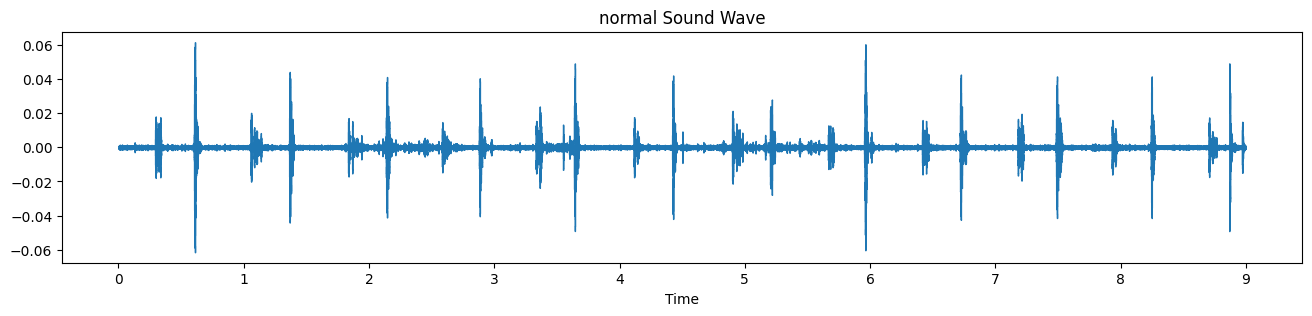

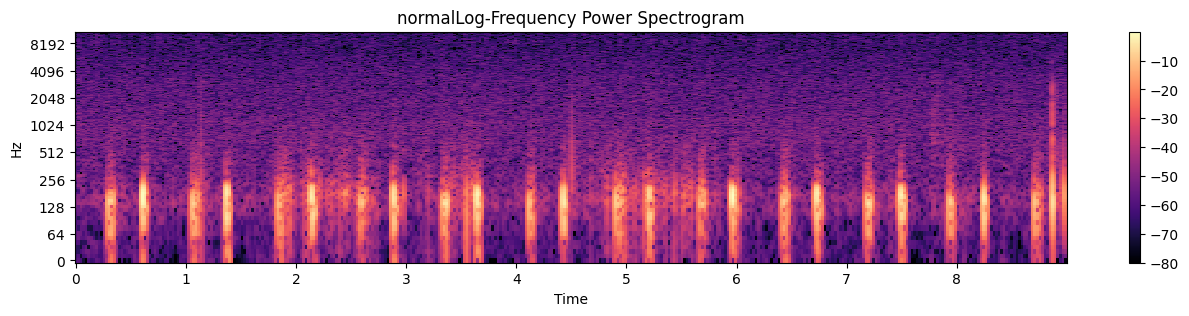

In [99]:

# Plotting graphs for Normal Heartbeat Sound
path = raw_data[raw_data.label==unique_labels[0]].file_path.iloc[3]
print(path)
waveform(path, unique_labels[0])
spectrogram(path, unique_labels[0])
ipd.Audio(path)




/content/HeartBeatSounds/archive/set_a/artifact__201106070949.wav


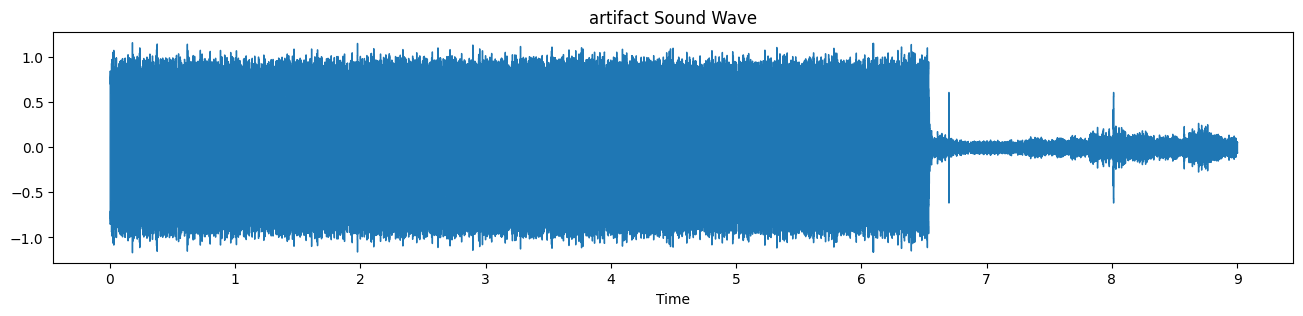

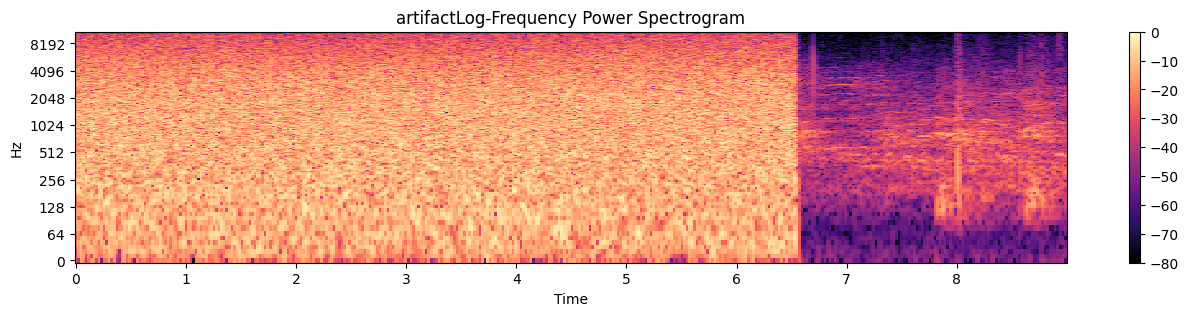

In [16]:

# Plotting graphs for Extrahls Heartbeat Sound
path = raw_data[raw_data.label==unique_labels[1]].file_path.iloc[0]
print(path)
waveform(path, unique_labels[1])
spectrogram(path, unique_labels[1])
ipd.Audio(path)





/content/HeartBeatSounds/archive/set_a/murmur__201108222231.wav


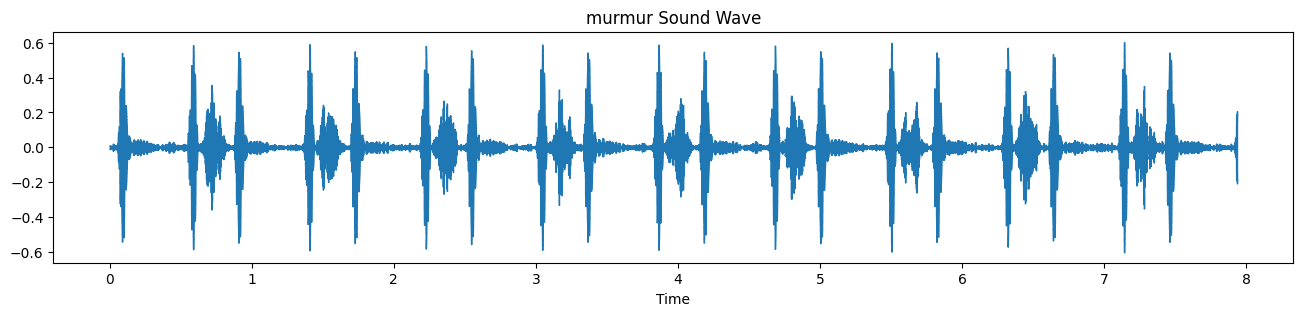

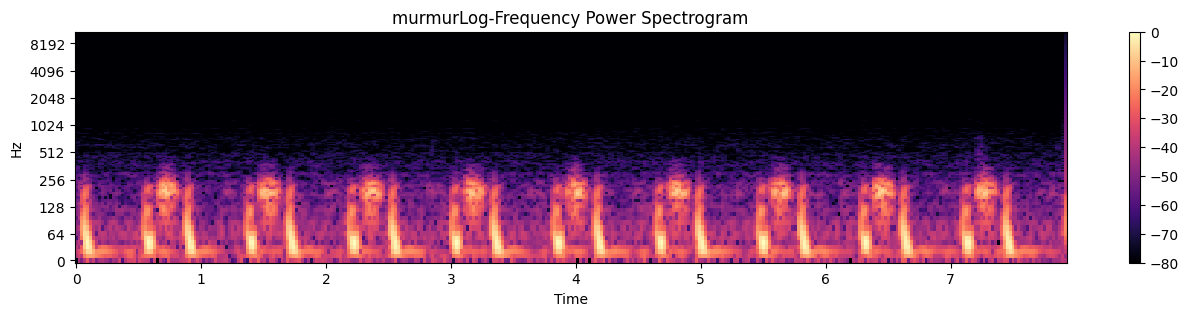

In [17]:
#Plotting graphs for Artifact Heartbeat Sound
path = raw_data[raw_data.label==unique_labels[2]].file_path.iloc[0]
print(path)
waveform(path,unique_labels[2])
spectrogram(path,unique_labels[2])
ipd.Audio(path)

/content/HeartBeatSounds/archive/set_a/extrahls__201101152255.wav


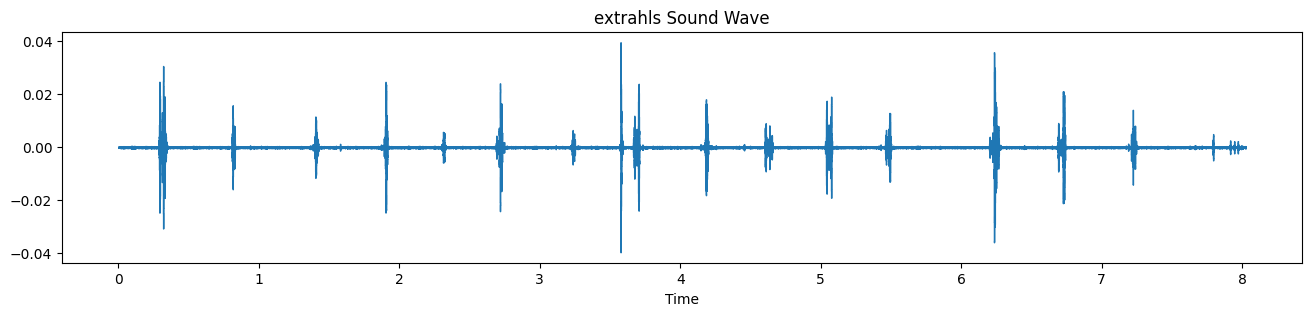

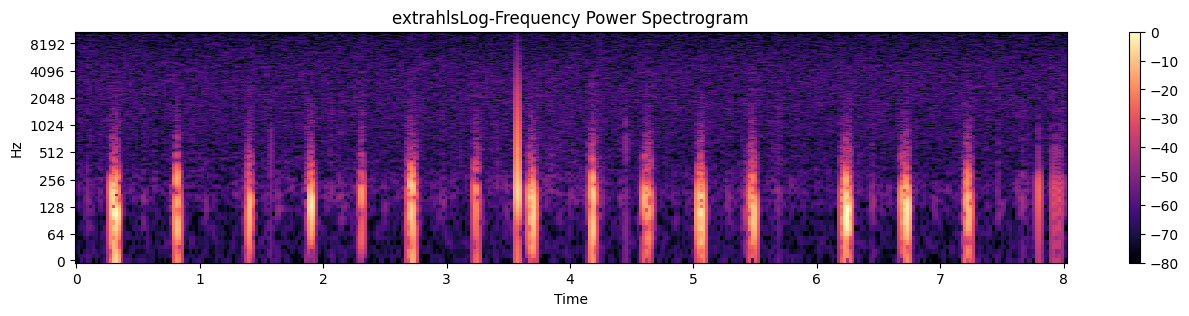

In [18]:
#Plotting graphs for Normal Heartbeat Sound
path = raw_data[raw_data.label==unique_labels[3]].file_path.iloc[0]
print(path)
waveform(path,unique_labels[3])
spectrogram(path,unique_labels[3])
ipd.Audio(path)

/content/HeartBeatSounds/archive/set_b/extrastole__237_1308750231222_C.wav


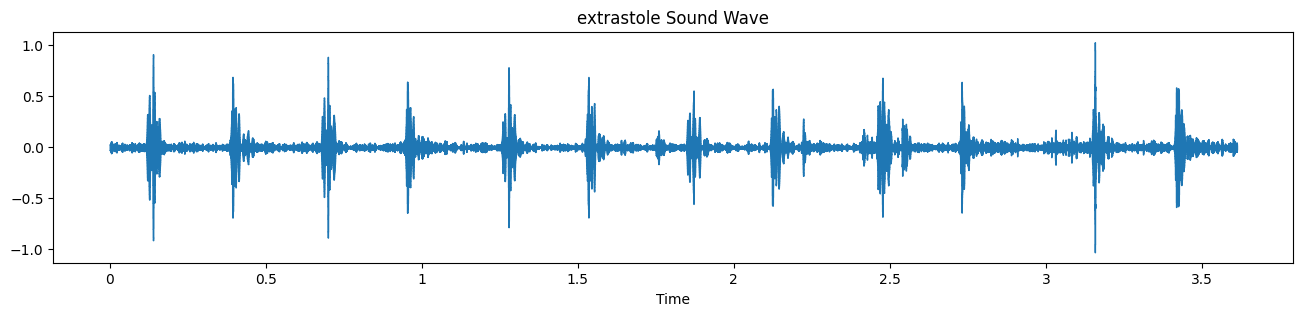

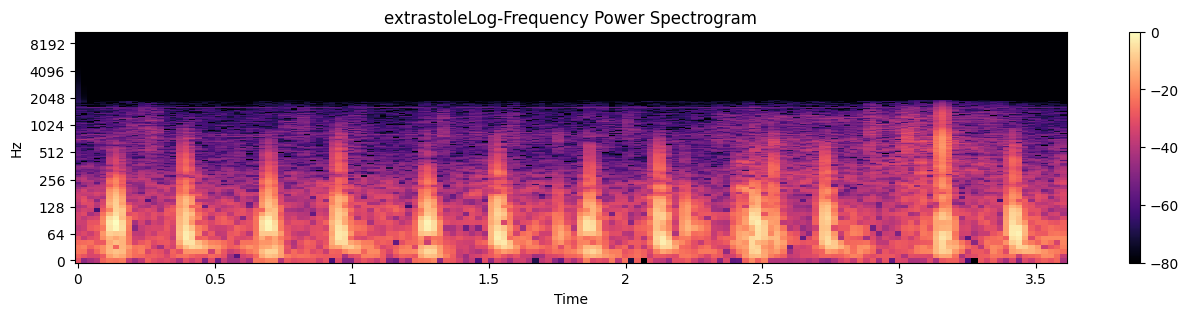

In [19]:
#Plotting graphs for Extrastole Heatbeat Sound
path = raw_data[raw_data.label==unique_labels[4]].file_path.iloc[4]
print(path)
waveform(path,unique_labels[4])
spectrogram(path,unique_labels[4])
ipd.Audio(path)



## 🔹Data Augmentation

**Data augmentation** is a technique commonly used in machine learning and deep learning to artificially increase the size and diversity of a training dataset by applying various transformations to the existing data samples. The aim is to improve the performance and generalization of machine learning models by exposing them to a wider range of variations and patterns in the data.

We decided to perform data augmentation with the two most popular data augmentation methods used for audio data:
1. By changing the speed of audio file
2. By changing the pitch of audio file


The **first function, changing_speed(),** takes three arguments: the speed rate, the source path, and the destination path. The speed rate is a float value that indicates how much faster or slower the sound should be played. A speed rate of 1 means that the sound will be played at its original speed. A speed rate of 2 means that the sound will be played twice as fast, and a speed rate of 0.5 means that the sound will be played half as fast. The function first gets a list of all of the files in the source directory. Then, it iterates through the list of files and loads each file into memory. The function then uses the **lib.effects.time_stretch()** function to change the speed of the sound file. The lib.effects.time_stretch() function takes two arguments: the sound file and the speed rate. The function then saves the modified sound file to the destination directory.

The **second function, changing_pitch()**, is similar to the first function, but it changes the pitch of the sound instead of the speed. The pitch is the frequency of the sound.The function takes three arguments: the pitch step, the source path, and the destination path. The pitch step is an integer value that indicates how many steps the pitch should be changed. A pitch step of 1 means that the pitch will be increased by one semitone, and a pitch step of -1 means that the pitch will be decreased by one semitone.The function then uses the **lib.effects.pitch_shift()** function to change the pitch of the sound file. The lib.effects.pitch_shift() function takes three arguments: the sound file, the sampling rate, and the pitch step.The function then saves the modified sound file to the destination directory.

In [20]:
def changing_speed(speed_rate, src_path, dst_path):
    files = get_fileNames(src_path + "//**")
    if not os.path.exists(dst_path):
      os.makedirs(dst_path)
    for file in tqdm(files):
      label = os.path.basename(file).split('.')[0]
      y, sr = lib.load(file)
      updated_y = lib.effects.time_stretch(y, rate=speed_rate)
      soundfile.write(dst_path + '//' + label + '_' + str(speed_rate) + ".wav", updated_y, sr)

In [21]:
def changing_pitch(step, src_path, dst_path):
    files = get_fileNames(src_path + '//**')
    if not os.path.exists(dst_path):
      os.makedirs(dst_path)
    for file in tqdm(files):
      label = os.path.basename(file).split('.')[0]
      y, sr = lib.load(file)
      updated_y = lib.effects.pitch_shift(y, sr=sr, n_steps=step)
      soundfile.write(dst_path + '//' + label + '_' + str(step) + '.wav', updated_y, sr)

In [28]:
def sound_augmentation(src_path, dst_path):
    speed_rates = [1.08, 0.8, 1.10, 0.9]
    for speed_rate in speed_rates:
        changing_speed(speed_rate, src_path, dst_path)


    steps = [2, -2, 2.5, -2.5]
    for step in steps:
        changing_pitch(step, src_path, dst_path)

    files = get_fileNames(src_path + '//**')
    for f in files:
      shutil.copy(f, dst_path)

## 🔹Making seperate directory

To preserve the integrity of the original data, it is advisable not to modify or alter it directly. Therefore, we have established a designated working directory and created a separate folder called "data2" using the code below. In this folder, we have made copies of the data from "set_a" and "set_b." This allows us to safely apply data augmentation techniques within the working directory without affecting the original files. By manipulating the audio files within this environment, we can generate new versions of the files and save them in the designated working/data folder for further analysis and processing.

Then we are creating a dataframe again and saving it in variable "final_data"

In [29]:
#Create working directory and Data2 directory
os.mkdir('working')
os.chdir('working')
os.mkdir('Data2')

In [30]:
def fill_folder1_toData2(folder_name): #folder1: set_a , folder2: set_b
    source = data_path+folder_name
    destination = data_path+'working/Data2/'

    # Get a list of files in the source directory
    file_list = os.listdir(source)

    # Iterate over the files and copy them to the destination directory
    for file_name in file_list:
        source_file = os.path.join(source, file_name)
        destination_file = os.path.join(destination, file_name)
        shutil.copy2(source_file, destination_file)

In [33]:
#move to desired working directory, preferably where your datasets sits
os.chdir(data_path)


#copy files in set_a and set_b files into working/Data2 folder
fill_folder1_toData2("set_a")
fill_folder1_toData2("set_b")



In [34]:
#change directory and create a new directory there
os.chdir(data_path+'working/')
os.mkdir('OUT')


In [35]:
def create_new_augmented_data_files():
    # Checking and creating new directory for saving newly generated audio files using data augmentation
    if os.path.exists(data_path+'working/OUT'):
      if len(get_fileNames(data_path+'working/OUT//**')) == 4175:
          print('Sound Augmentation Already Done and Saved')
      else:
          shutil.rmtree(data_path+'working/OUT')
          sound_augmentation(data_path+'working/Data2', data_path+'working/OUT')
    else:
        sound_augmentation(data_path+'working/Data2', data_path+'working/OUT')

In [36]:
#Checking and creating new directory for saving newly generated audio files using data augmentation
create_new_augmented_data_files()

100%|██████████| 832/832 [00:56<00:00, 14.61it/s]


In [37]:
#Creating new dataframe from the Updated Audio Dataset
#final_data = [data_path+'working/OUT/']
final_data = create_dataframe("final_data", [data_path+'working/OUT/'])
final_data



file_path       label
0     /content/HeartBeatSounds/archive/working/OUT/n...      normal
1     /content/HeartBeatSounds/archive/working/OUT/n...      normal
2     /content/HeartBeatSounds/archive/working/OUT/n...      normal
3     /content/HeartBeatSounds/archive/working/OUT/n...      normal
4     /content/HeartBeatSounds/archive/working/OUT/n...      normal
...                                                 ...         ...
4170  /content/HeartBeatSounds/archive/working/OUT/n...      normal
4171  /content/HeartBeatSounds/archive/working/OUT/m...      murmur
4172  /content/HeartBeatSounds/archive/working/OUT/n...      normal
4173  /content/HeartBeatSounds/archive/working/OUT/n...      normal
4174  /content/HeartBeatSounds/archive/working/OUT/e...  extrastole

[4175 rows x 2 columns]

In [38]:
#Counting the number of lables in the final dataframe
final_data.label.value_counts()



normal        2300
murmur        1032
artifact       360
extrastole     341
extrahls       142
Name: label, dtype: int64

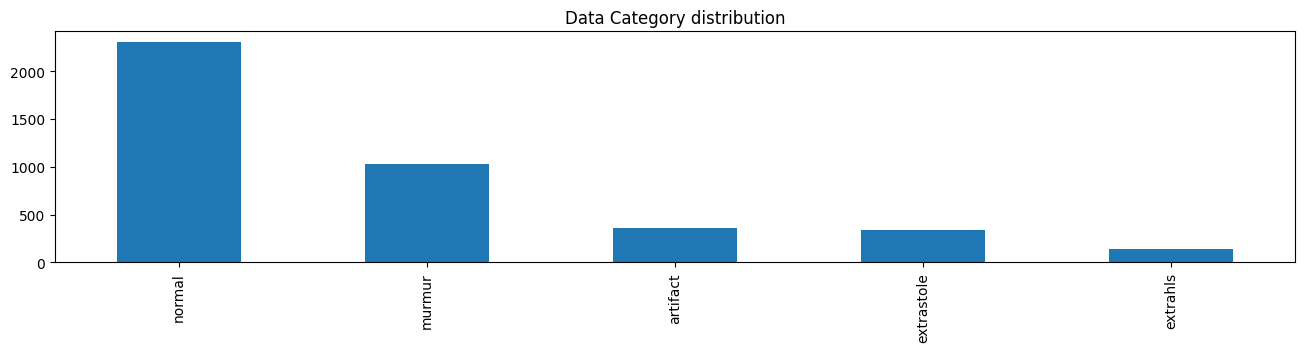

In [39]:
#Data Distribution Graph
data_distribution(final_data)

## 🔹Splitting the Data

In the following code blocks, we have performed the task of **splitting the dataset into training and test sets with a ratio of 80:20**. This step is crucial because it allows us to evaluate the accuracy and correctness of the trained model. By training the model on the training set, we aim to make it learn patterns and relationships within the data. Subsequently, we test the model's performance using the test set, which consists of unseen data, to assess how well it generalizes to new instances.


Moving on to the next code block, the function named **feature_extraction()** is designed to extract relevant features from a given sound file. This function takes a single argument, which is the path to the sound file from which we want to extract the features.


To begin, the function loads the sound file into memory and sets the sampling rate to 22050. The sampling rate denotes the number of samples recorded per second in the sound file.Next, the function limits the duration of the sound file to 3 seconds. This ensures that only the initial 3 seconds of the sound file will be used for feature extraction.


Lastly, the function employs the process of feature extraction known as MFCC (Mel Frequency Cepstral Coefficients). MFCC features are a set of attributes derived from audio signals and are commonly employed in applications such as speech recognition and audio processing. Ultimately, the function returns the extracted MFCC features as a numpy array, which can then be used for further analysis and modeling.


In [103]:
def split_for_training_testing(final_data):
    # Splitting the Data into Training Data and Testing Data in the proportion of 80:20 (Train:Test)
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_idx, test_idx in split.split(final_data, final_data.label):
        train_data = final_data.loc[train_idx]
        test_data = final_data.loc[test_idx]
        return [train_data, test_data]

In [108]:
#Splitting the Data into Training Data and Testing Data in the proportion of 80:20 (Train:Test)
split_train_test_data = split_for_training_testing(final_data)
#training data
train_data = split_train_test_data[0]
test_data = split_train_test_data[1]


In [106]:
#display total training data
train_data


file_path       label
3346  /content/HeartBeatSounds/archive/working/OUT/m...      murmur
3693  /content/HeartBeatSounds/archive/working/OUT/n...      normal
124   /content/HeartBeatSounds/archive/working/OUT/n...      normal
3950  /content/HeartBeatSounds/archive/working/OUT/m...      murmur
2877  /content/HeartBeatSounds/archive/working/OUT/n...      normal
...                                                 ...         ...
653   /content/HeartBeatSounds/archive/working/OUT/n...      normal
1258  /content/HeartBeatSounds/archive/working/OUT/m...      murmur
3809  /content/HeartBeatSounds/archive/working/OUT/m...      murmur
3457  /content/HeartBeatSounds/archive/working/OUT/n...      normal
3804  /content/HeartBeatSounds/archive/working/OUT/e...  extrastole

[3340 rows x 2 columns]

In [107]:
#display total testing data
test_data

file_path       label
244   /content/HeartBeatSounds/archive/working/OUT/n...      normal
1976  /content/HeartBeatSounds/archive/working/OUT/n...      normal
3365  /content/HeartBeatSounds/archive/working/OUT/e...  extrastole
4062  /content/HeartBeatSounds/archive/working/OUT/n...      normal
3877  /content/HeartBeatSounds/archive/working/OUT/n...      normal
...                                                 ...         ...
3836  /content/HeartBeatSounds/archive/working/OUT/m...      murmur
2846  /content/HeartBeatSounds/archive/working/OUT/n...      normal
645   /content/HeartBeatSounds/archive/working/OUT/n...      normal
2685  /content/HeartBeatSounds/archive/working/OUT/n...      normal
2083  /content/HeartBeatSounds/archive/working/OUT/e...    extrahls

[835 rows x 2 columns]

In [42]:
#Setting the sampling audio rate to 22050, setting the duration only to 3 seconds and finally
# extraction of MFCC features
def feature_extraction(file_path):
    y, sr = lib.load(file_path, duration=3)
    mfcc = lib.feature.mfcc(y=y, sr=sr,n_mfcc=128)
    return mfcc

In [43]:
def create_xtrain_xtest(train_data, test_data):
    x_train = np.asarray([feature_extraction(train_data.file_path.iloc[i]) for i in (range(len(train_data)))])
    x_test = np.asarray([feature_extraction(test_data.file_path.iloc[i]) for i in (range(len(test_data)))])
    return [x_train, x_test]

In [110]:
#Create x_train and x_test for training and testing
x_train_x_test = create_xtrain_xtest(train_data, test_data)
#x_train data
x_train = x_train_x_test[0]
#x_test data
x_test = x_train_x_test[1]


In [111]:
#display all x_train data
x_train


array([[[-4.40543884e+02, -4.59403961e+02, -4.77266174e+02, ...,
         -5.08014618e+02, -5.01304779e+02, -4.72397736e+02],
        [ 1.11814735e+02,  1.10474716e+02,  9.59904327e+01, ...,
          5.39646301e+01,  6.16727524e+01,  8.42889786e+01],
        [ 5.10206833e+01,  8.21511993e+01,  8.68269501e+01, ...,
          4.86666298e+01,  5.19383469e+01,  4.33666840e+01],
        ...,
        [-2.20693588e-01,  1.52099609e-01,  1.08628082e+00, ...,
          1.66938782e-01,  4.39123154e-01, -1.37602806e-01],
        [-4.99897003e-02,  4.64099884e-01,  9.23885345e-01, ...,
          2.85739899e-01,  7.88957596e-01, -9.18769836e-03],
        [ 2.66647339e-02,  4.05414581e-01,  5.40950775e-01, ...,
          2.09447861e-01,  5.99939346e-01,  1.08367920e-01]],

       [[-3.79166901e+02, -4.00372620e+02, -4.30348816e+02, ...,
         -4.11276459e+02, -3.86048279e+02, -3.33724182e+02],
        [ 1.64176300e+02,  1.92692505e+02,  1.84364380e+02, ...,
          2.06881287e+02,  2.11538513e

In [112]:
#display all x_test data
x_test

array([[[-4.50526093e+02, -4.45313049e+02, -4.40622040e+02, ...,
         -4.27923157e+02, -4.25273285e+02, -4.30254608e+02],
        [ 1.34443817e+02,  1.45885788e+02,  1.54481598e+02, ...,
          1.64385223e+02,  1.67366104e+02,  1.55274231e+02],
        [ 3.79723282e+01,  4.68552704e+01,  5.71479950e+01, ...,
          5.02686920e+01,  5.12476463e+01,  4.41693878e+01],
        ...,
        [ 5.33268213e-01,  8.45096171e-01,  1.75852370e+00, ...,
         -6.28485680e-02, -1.46246910e-01, -8.79597664e-03],
        [ 1.41616440e+00,  1.49568558e+00,  1.79580116e+00, ...,
          1.15346909e-01, -7.77435303e-03, -3.52664948e-01],
        [ 1.43830109e+00,  1.36259460e+00,  1.01737976e+00, ...,
          3.86322021e-01,  1.43417358e-01, -2.06619263e-01]],

       [[-3.82411652e+02, -3.74698914e+02, -3.85695190e+02, ...,
         -4.13487152e+02, -3.68682861e+02, -2.94898865e+02],
        [ 1.51943726e+02,  1.71379669e+02,  1.68689743e+02, ...,
          1.51465378e+02,  1.42950378e

In [47]:
def reshape_xtrain_x_test(x_train, x_test):
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
    return [x_train, x_test]

In [48]:
#Changing the shape of the Training and Testing inputs to (3340, 128, 130, 1) to meet the CNN input requirements
reshape_x_train_x_test = reshape_xtrain_x_test(x_train, x_test)
x_train = reshape_x_train_x_test[0]
x_test = reshape_x_train_x_test[1]
#Print x_train and x_test reshape tuple
print("X_Train Shape: ", x_train.shape)
print("X_Test Shape: ", x_test.shape)

X_Train Shape:  (3340, 128, 130, 1)
X_Test Shape:  (835, 128, 130, 1)


The function encode_label() takes two arguments: the training data and the test data. The training data is a dataframe that contains the features and labels of the training set. The test data is a dataframe that contains the features and labels of the test set.

The function first creates an encoder object. The encoder object is used to encode the labels into numbers from string values. The labels in the training data are strings, such as "normal" and "artifacts". The encoder object will convert these strings into numbers, such as 0 and 1.

The function then encodes the labels in the training data and the test data. The encoded labels are stored in the variables y_train and y_test.

The function finally returns the variables y_train and y_test.

In [49]:
def encode_label(train_data, test_data):
    # Encode the labels into numbers from string values
    y_train = encode.fit_transform(train_data.label)
    y_test = encode.fit_transform(test_data.label)
    return [y_train, y_test]


In [50]:
#Encode the labels into numbers from string values
encode_label_value = encode_label(train_data, test_data)

#Get y_train and y_test
y_train = encode_label_value[0]
y_test = encode_label_value[1]

In [51]:
def y_train_y_test_to_categorical(y_train, y_test):
    # Setting 5 labels for each audio example with their probabilities
    y_train = to_categorical(y_train, num_classes=5)
    y_test = to_categorical(y_test, num_classes=5)
    return [y_train, y_test]


In [52]:
#Setting 5 labels for each audio example with their probabilities
y_train_y_test_value = y_train_y_test_to_categorical(y_train, y_test)

#update y_train and y_test data
y_train = y_train_y_test_value[0]
y_test = y_train_y_test_value[1]

In [53]:
#Print new shape
print("Y_Train Shape: ", y_train.shape)
print("Y_Test Shape: ", y_test.shape)

Y_Train Shape:  (3340, 5)
Y_Test Shape:  (835, 5)


## 🔹Creating a CNN model



For the purpose of training our data We have decided to go with CNN model which gave the best accuracy after trying many other model's.

**A short description of CNN -**

A CNN (Convolutional Neural Network) is a deep learning algorithm specifically designed for processing and analyzing visual data, such as images. It is inspired by the way our brain processes information through interconnected neurons.In simple terms, a CNN consists of layers that learn to recognize patterns and features in images. The key component of a CNN is the convolutional layer. In this layer, small filters or kernels are applied to the input image, scanning it in a sliding window-like manner. These filters detect specific patterns, such as edges, corners, or textures, by performing mathematical operations on the pixel values.

As the input image passes through multiple convolutional layers, the network becomes capable of capturing increasingly complex features. The output of the convolutional layers is then passed through pooling layers, which downsample the feature maps, reducing their dimensionality while preserving the important information. This helps in improving computational efficiency and generalization. After several convolutional and pooling layers, the feature maps are flattened into a 1D vector and fed into one or more fully connected layers. These fully connected layers perform high-level feature extraction and classification. They learn to recognize and classify the input image based on the features extracted by the convolutional layers.

**CNN for sound files**

In the case of sound files, the audio data is typically represented as a waveform, which is a plot of the amplitude of the sound signal over time. To train a CNN on sound files, we need to convert this waveform data into a format that the network can process.One common approach is to use spectrograms, which are a visual representation of the frequency content of a sound signal over time. A spectrogram breaks down the audio signal into small segments and calculates the intensity of different frequency components in each segment. This results in a 2D matrix, where the x-axis represents time, the y-axis represents frequency, and the intensity values represent the magnitude of each frequency component.

To train a CNN on sound files, the spectrogram matrices are used as input data. The CNN is designed to take in these 2D matrices and learn patterns and features from them. The convolutional layers of the CNN analyze the local patterns in the spectrogram, such as variations in frequency content over time. Pooling layers can be used to downsample the feature maps, similar to how they are used in image processing.The fully connected layers at the end of the CNN receive the flattened feature maps from the previous layers and perform classification based on the learned features. The network is trained using labeled sound data, where each sound file is associated with a specific class or label. During training, the network adjusts its weights and biases through backpropagation, comparing its predictions with the true labels and optimizing the parameters to minimize prediction errors.

In [54]:
def CNN_model(n_width,n_height,n_channels,n_dropout,n_classes):
        cnn_model = Sequential()

        cnn_model.add(Conv2D(filters=24, kernel_size=(5,5), strides=(1, 1),
                             input_shape=(n_width,n_height,n_channels), activation ='relu'))
        cnn_model.add(MaxPooling2D((4, 2), strides=(4, 2)))

        cnn_model.add(Conv2D(filters=48, kernel_size=(5,5), padding = 'valid', activation ='relu'))
        cnn_model.add(MaxPooling2D((4, 2), strides=(4, 2)))

        cnn_model.add(Conv2D(filters=48, kernel_size=(5,5), padding = 'valid', activation ='relu'))

        cnn_model.add(Flatten())
        cnn_model.add(Dropout(rate=n_dropout))

        cnn_model.add(Dense(64, activation ='relu'))
        cnn_model.add(Dropout(rate=n_dropout))

        cnn_model.add(Dense(n_classes, activation ='softmax'))

        return cnn_model

In [55]:
def cnn_model(x_train):
    return CNN_model(x_train.shape[1], x_train.shape[2], x_train.shape[3], 0.5, len(encode.classes_))

def setting_learning_rate_loss_ftn(cnn_model):
    #Setting the learning rate and loss function for the model
    optimizer = Adam(learning_rate=0.0001)
    cnn_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    cnn_model.summary()

In [56]:
#Create CNN model
cnn_model_value = cnn_model(x_train)

#Setting the learninig rate and Loss function for the model
setting_learning_rate_loss_ftn(cnn_model_value)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 126, 24)      624       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 63, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 59, 48)        28848     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 29, 48)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 25, 48)         57648     
                                                                 
 flatten (Flatten)           (None, 2400)              0

In [113]:
#model history is obtained from training, so if you want to keep the history, you should save it just as you save the cnn_model
def train_model(cnn_model, y_train, y_test, x_train, x_test):
    os.times
    os.chdir(parent_data_path)
    # Training the model over 300 times and having a batch size of 128 and saving the best model in a .hdf5 file
    epochs = 300
    batch_size = 128
    file = 'cnn_heartbeat_classifier.h5'
    path = os.path.join(file)

    file_last = 'LAST_MODEL.h5'
    path1 = os.path.join(file_last)

    checkpoints_0 = ModelCheckpoint(filepath=path, save_best_only=True, verbose=1)
    checkpoints_1 = ModelCheckpoint(filepath=path1, save_best_only=False, verbose=1)

    cnn_history = cnn_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test),
                                callbacks=[checkpoints_0, checkpoints_1], verbose=1)
    return cnn_history

In [58]:
#get cnn_model from saved model if don't want to run training
# cnn_model_value = get_model_from_file('/content/HeartBeatSounds/archive/saved/my_model') #return in tensorflow format

#CNN history
cnn_history = train_model(cnn_model_value, y_train, y_test, x_train, x_test)


Epoch 1/300
27/27 [==============================] - ETA: 0s - loss: 2.5002 - accuracy: 0.4045
Epoch 1: val_loss improved from inf to 1.17889, saving model to cnn_heartbeat_classifier.hdf5

Epoch 1: saving model to LAST_MODEL.hdf5
27/27 [==============================] - 58s 2s/step - loss: 2.5002 - accuracy: 0.4045 - val_loss: 1.1789 - val_accuracy: 0.5569
Epoch 2/300
27/27 [==============================] - ETA: 0s - loss: 1.2775 - accuracy: 0.5192
Epoch 2: val_loss improved from 1.17889 to 1.07059, saving model to cnn_heartbeat_classifier.hdf5

Epoch 2: saving model to LAST_MODEL.hdf5
27/27 [==============================] - 54s 2s/step - loss: 1.2775 - accuracy: 0.5192 - val_loss: 1.0706 - val_accuracy: 0.5653
Epoch 3/300
27/27 [==============================] - ETA: 0s - loss: 1.1319 - accuracy: 0.5698
Epoch 3: val_loss improved from 1.07059 to 1.02412, saving model to cnn_heartbeat_classifier.hdf5

Epoch 3: saving model to LAST_MODEL.hdf5
27/27 [==============================] - 

In [60]:
#save cnn_history
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(cnn_history.history)

# save to json:
hist_json_file = 'history.json' #save to directory of your choice
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv:
hist_csv_file = 'history.csv' #save to directory of your choice
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)


In [61]:
def get_cnn_history(cnn_history):
    return cnn_history.history

history = get_cnn_history
history

<function __main__.get_cnn_history(cnn_history)>

In [62]:
def display_best_training_accruracy_loss_score(cnn_model, x_train, y_train):
    # Displaying the best training accuracy and loss score
    training_scores = cnn_model.evaluate(x_train, y_train)
    return training_scores

In [63]:
#Displaying the best training accuracy and loss score
training_scores = display_best_training_accruracy_loss_score(cnn_model_value, x_train, y_train)
#Print scores
print('Least Training Loss:', training_scores[0])
print('Best Training Accuracy:', training_scores[1])


105/105 [==============================] - 12s 116ms/step - loss: 0.0070 - accuracy: 0.9982
Least Training Loss: 0.006955649238079786
Best Training Accuracy: 0.9982035756111145


In [64]:
def display_best_testing_accruracy_loss_score(cnn_model, x_test, y_test):
    # Displaying the best training accuracy and loss score
    testing_scores = cnn_model.evaluate(x_test, y_test)
    return testing_scores


In [65]:
#Displaying the best testing accuracy and loss score
testing_scores = display_best_testing_accruracy_loss_score(cnn_model_value, x_test, y_test)
#Print scores
print('Least Testing Loss:', testing_scores[0])
print('Best Testing Accuracy:', testing_scores[1])

27/27 [==============================] - 4s 159ms/step - loss: 0.3532 - accuracy: 0.8994
Least Testing Loss: 0.3531929850578308
Best Testing Accuracy: 0.8994011878967285


27/27 [==============================] - 3s 105ms/step


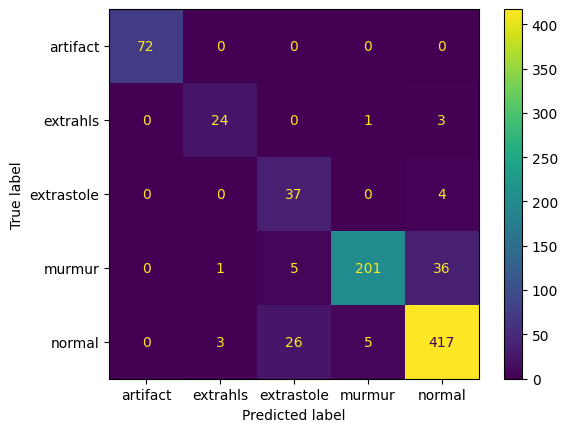

In [66]:
cm_cnn=confusion_matrix(cnn_model_value.predict(x_test).argmax(axis=1),y_test.argmax(axis=1))
#
label_names = ['artifact','extrahls','extrastole','murmur','normal']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels = label_names)
disp.plot()
plt.show()

In [67]:
def calculate_display_precision(cnn_model, x_test, y_test):
    #Calculating and displaying the Precison, Recall and F1 score for each class
    preds = cnn_model.predict(x_test)
    y_actual = []
    y_pred = []

    labels = encode.classes_
    for idx, pred in enumerate(preds):
        y_actual.append(labels[np.argmax(y_test[idx])])
        y_pred.append(labels[np.argmax(pred)])

    print(classification_report(y_pred, y_actual))
    return [y_actual, y_pred]

In [94]:
#
y_actual_y_pred = calculate_display_precision(cnn_model_value, x_test, y_test)
y_actual = y_actual_y_pred[0]
y_pred = y_actual_y_pred[1]


27/27 [==============================] - 4s 156ms/step
              precision    recall  f1-score   support

    artifact       1.00      1.00      1.00        72
    extrahls       0.86      0.86      0.86        28
  extrastole       0.54      0.90      0.68        41
      murmur       0.97      0.83      0.89       243
      normal       0.91      0.92      0.92       451

    accuracy                           0.90       835
   macro avg       0.86      0.90      0.87       835
weighted avg       0.91      0.90      0.90       835



In [72]:
def plot_epoch_vs_train_test_accuracy_graph(cnn_history_history):
    #Plotting epoch vs Training and Testing accuracy Graph
    plt.figure(figsize=(16,6))
    plt.plot(cnn_history_history['accuracy'], color = "b")
    plt.plot(cnn_history_history['val_accuracy'], color = 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training Accuracy','Testing Accuracy'],loc='upper left')

In [73]:
def plot_epoch_vs_train_test_loss_graph(cnn_history_history):
    #Plotting epoch vs Training and Testing loss Graph
    plt.figure(figsize=(16,8))
    plt.plot(cnn_history_history['loss'], color = "b")
    plt.plot(cnn_history_history['val_loss'], color="r")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training Loss','Testing Loss'],loc='upper right')

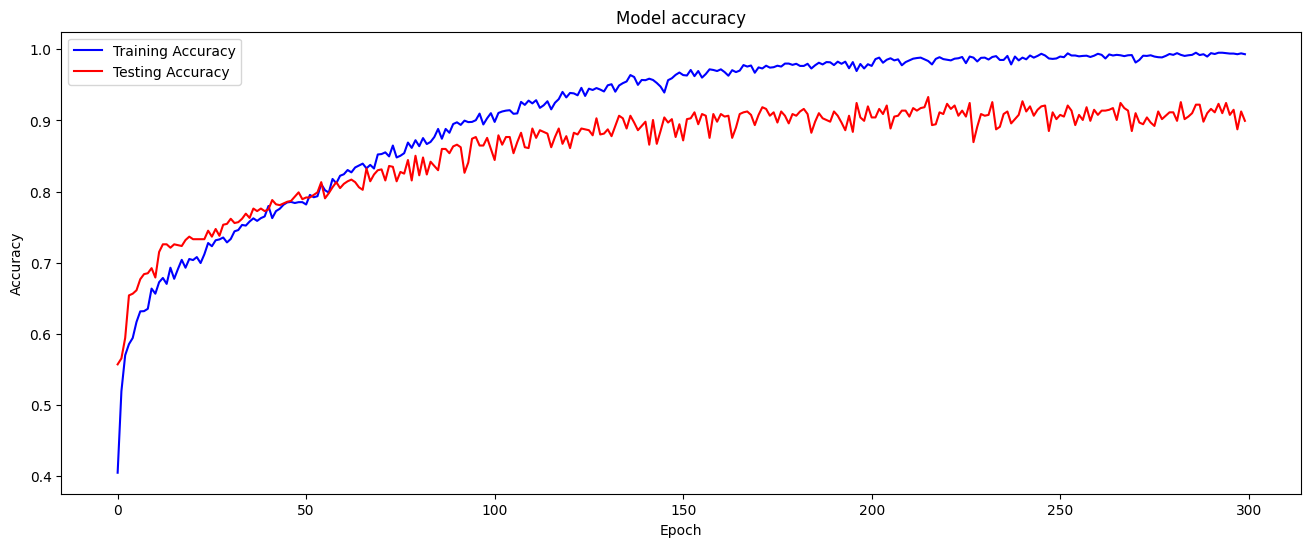

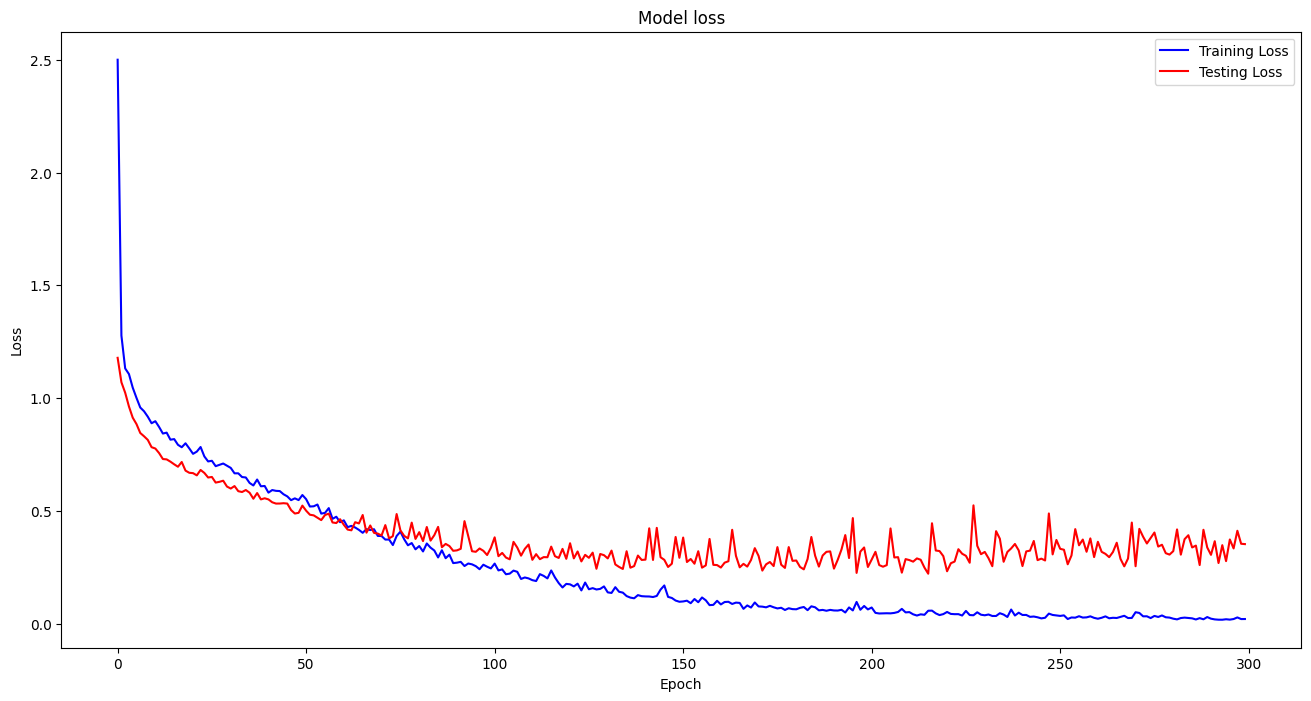

In [75]:
history = cnn_history.history #remove, temporary
#
plot_epoch_vs_train_test_accuracy_graph(history) #cnn_model_value.history.history
#
plot_epoch_vs_train_test_loss_graph(history)

In [77]:
def get_restored_model_accuracy(cnn_model_value, x_test, y_test):
    loss, acc = cnn_model_value.evaluate(x_test, y_test, verbose=2)
    return 'Restored model, accuracy: {:5.2f}%'.format(100 * acc)


In [78]:
def save_model(cnn_model_value, file_name): #save without extension or my_model.h5
    cnn_model_value.save(file_name)


def get_model_from_file(file_path): #return in tensorflow format
    fetched_model = tf.keras.models.load_model(file_path)
    return fetched_model

In [92]:
#
# os.mkdir('saved_model')
os.chdir(data_path)
#Save model without extension, ensure you are in the directory you want to save file
save_model(cnn_model_value, 'my_model.h5')
 #e.g. my_model.h5 so if you save a model in any type apart from h5 here on google colab you are likely to get it in a folder containing variables ,assets and other meta data


#change in directory where file is

# new_model = get_model_from_file('my_model')

In [80]:
#just to check the architecture of your model
new_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 126, 24)      624       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 63, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 59, 48)        28848     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 29, 48)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 25, 48)         57648     
                                                                 
 flatten (Flatten)           (None, 2400)              0

In [81]:
def convert_model_to_tflite(file_name):
    keras_model = tf.keras.models.load_model(file_name) #my_model.h5
    converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
    converter.experimental_new_converter = True
    tflite_model = converter.convert()
    open(file_name+".tflite", "wb").write(tflite_model)

In [93]:
#convert training to tflite
convert_model_to_tflite('my_model.h5')

In [83]:
#
restored_model_accuracy = get_restored_model_accuracy(cnn_model_value, x_test, y_test)
print(restored_model_accuracy + '\n')

27/27 - 3s - loss: 0.3532 - accuracy: 0.8994 - 3s/epoch - 113ms/step
Restored model, accuracy: 89.94%

